### Writing Funcitons in Python 

### Chapter 1 - Beast Practices

the first chapter starts off with best practices when writing functions. You'll cover docstrings and why they matter and how to know when you need to turn a chunk of code into a function. You will also learn the details of how Python passes arguments to functions, as well as some common gotchas that can cause debugging headaches when calling functions.

##### Crafting a docstring

The first function you write is count_letter(). It takes a string and a single letter and returns the number of times the letter appears in the string. You want the users of your open-source package to be able to understand how this function works easily, so you will need to give it a docstring. Build up a Google Style docstring for this function by following these steps.

In [1]:
# Copy the following string and add it as the docstring for the function:
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

#### Retrieving docstrings

You and a group of friends are working on building an amazing new Python IDE (integrated development environment -- like PyCharm, Spyder, Eclipse, Visual Studio, etc.). The team wants to add a feature that displays a tooltip with a function's docstring whenever the user starts typing the function name. That way, the user doesn't have to go elsewhere to look up the documentation for the function they are trying to use. You've been asked to complete the build_tooltip() function that retrieves a docstring from an arbitrary function.

In [2]:
# Get the "count_letter" docstring by using an attribute of the function
docstring = count_letter.__doc__

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))

############################
Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  
############################


In [3]:
# Now use a function from the inspect module to get a better-formatted version of count_letter()'s docstring.
import inspect

# Inspect the count_letter() function to get its docstring
docstring = inspect.getdoc(count_letter)

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))


############################
Count the number of times `letter` appears in `content`.

Args:
  content (str): The string to search.
  letter (str): The letter to search for.

Returns:
  int

# Add a section detailing what errors might be raised
Raises:
  ValueError: If `letter` is not a one-character string.
############################


In [4]:
import inspect

def build_tooltip(function):
  """Create a tooltip for any function that shows the
  function's docstring.

  Args:
    function (callable): The function we want a tooltip for.

  Returns:
    str
  """
  # Get the docstring for the "function" argument by using inspect
  docstring = inspect.getdoc(build_tooltip)
  border = '#' * 28
  return '{}\n{}\n{}'.format(border, docstring, border)

print(build_tooltip(count_letter))
print(build_tooltip(range))
print(build_tooltip(print))

############################
Create a tooltip for any function that shows the
function's docstring.

Args:
  function (callable): The function we want a tooltip for.

Returns:
  str
############################
############################
Create a tooltip for any function that shows the
function's docstring.

Args:
  function (callable): The function we want a tooltip for.

Returns:
  str
############################
############################
Create a tooltip for any function that shows the
function's docstring.

Args:
  function (callable): The function we want a tooltip for.

Returns:
  str
############################


#### Extract a function

While developing a model to predict college graduations, you wrote the code below to get the z-scores of students' yearly GPAs (z-scores indicate standard deviation from the mean). Now you're ready to turn it into a production-quality system, so you need to do something about the repetition. Writing a function to calculate z-scores would improve it.

In [6]:
# import the excel file in which I saved the data
import pandas as pd

df = pd.read_excel('chapter1.xlsx')

print(df.head())

   y1_gpa  y2_gpa  y3_gpa  y4_gpa
0   2.786   2.053   2.171   0.066
1   1.145   2.666   0.267   2.885
2   0.907   0.424   2.613   0.031
3   2.205   0.524   3.984   0.339
4   2.878   1.288   3.078   0.902


In [7]:
def standardize(column):
  """Standardize the values in a column.

  Args:
    column (pandas Series): The data to standardize.

  Returns:
    pandas Series: the values as z-scores
  """
  # Finish the function so that it returns the z-scores
  z_score = (df - df.mean()) / df.std()
  return z_score

# Standardize the GPAs for each year
df['y1_z'] = (df.y1_gpa - df.y1_gpa.mean()) / df.y1_gpa.std()
df['y2_z'] = (df.y2_gpa - df.y2_gpa.mean()) / df.y2_gpa.std()
df['y3_z'] = (df.y3_gpa - df.y3_gpa.mean()) / df.y3_gpa.std()
df['y4_z'] = (df.y4_gpa - df.y4_gpa.mean()) / df.y4_gpa.std()

#### Another example...

Instead of repeating code for the same thing whihc is bad in practice because you have to duplicate changes in each section you should write a single function and pass in the arguement

In [ ]:
""" Example code

train = pd.read_csv('train.csv') 
train_y = train['labels'].values
### <- there and there --v ###
train_X = train[col for col in train.columns if col != 'labels'].values 
train_pca = PCA(n_components=2).fit_transform(train_X) 
plt.scatter(train_pca[:,0], train_pca[:,1])


train = pd.read_csv('validation.csv') 
train_y = train['labels'].values
### <- there and there --v ###
train_X = train[col for col in train.columns if col != 'labels'].values 
train_pca = PCA(n_components=2).fit_transform(train_X) 
plt.scatter(train_pca[:,0], train_pca[:,1])

train = pd.read_csv('test.csv') 
train_y = train['labels'].values
### <- there and there --v ###
train_X = train[col for col in train.columns if col != 'labels'].values 
train_pca = PCA(n_components=2).fit_transform(train_X) 
plt.scatter(train_pca[:,0], train_pca[:,1])

"""

In [ ]:

def load_and_plot(path):
    """Load data set and plot the 1st 2 pricnciple components.
    
    Args:
        path (str): The location of the CSV file

    Returns:
        tuple of ndarray: (features, labels)
    """
    
    #load the data
    data = pd.read_csv(path)
    y = data['labels'].values
    x = data[col for col in data.columns 
             if col != 'labels'].values
    
    
    #plot the first 2 principle components
    train_pca = PCA(n_components=2).fit_transform(x)
    plt.scatter(pca[:,0], pca[:,1])
    
    # return loaded data
    return x, y

# pass in the arguements to our fucntion
train_x, train_y = load_and_plot('train_csv')
val_x, val_y = load_and_plot('validation_csv')
text_x, test_y = load_and_plot('test_csv')

However, it is better to split up the data into parts:

* More flexible
* Easier to understand
* Simpler to read
* Simpler to debug
* Easier to change

In [13]:
def load_values(path):
    """Load data set and plot the 1st 2 pricnciple components.
    
    Args:
        path (str): The location of the CSV file

    Returns:
        tuple of ndarray: (features, labels)
    """
    
    #load the data
    data = pd.read_csv(path)
    y = data['labels'].values
    x = data[col for col in data.columns 
             if col != 'labels'].values
    
    # return loaded data
    return x, y

SyntaxError: invalid syntax (561772335.py, line 14)

In [9]:
def plot_data(path):
    """Load data set and plot the 1st 2 pricnciple components.
    
    Args:
        path (str): The location of the CSV file

    Returns:
        tuple of ndarray: (features, labels)
    """

    #plot the first 2 principle components
    train_pca = PCA(n_components=2).fit_transform(x)
    plt.scatter(pca[:,0], pca[:,1])

#### Split up a function

Another engineer on your team has written this function to calculate the mean and median of a sorted list. You want to show them how to split it into two simpler functions: mean() and median()

    def mean_and_median(values):
      """Get the mean and median of a sorted list of `values`

      Args:
        values (iterable of float): A list of numbers

      Returns:
        tuple (float, float): The mean and median
      """
      mean = sum(values) / len(values)
      midpoint = int(len(values) / 2)
      if len(values) % 2 == 0:
        median = (values[midpoint - 1] + values[midpoint]) / 2
      else:
        median = values[midpoint]

      return mean, median

In [15]:
def mean(values):
    """Get the mean of a sorted list of values

    Args:
        values (iterable of float): A list of numbers

    Returns:
        float
    """
    # Write the mean() function
    mean = sum(values) / len(values)
    return mean

In [17]:
def median(values):
    """Get the median of a sorted list of values

    Args:
        values (iterable of float): A list of numbers

    Returns:
        float
    """
    # Write the median() function
    midpoint = int(len(values) / 2)
    if len(values) % 2 == 0:
        median = (values[midpoint - 1] + values[midpoint]) / 2
    else:
        median = values[midpoint]
    return median

#### Basics of a function - Pass by assignment:

* Let's say we have a function foo() that takes a list and sets the first value of the list to 99. Then we set "my_list" to the value [1, 2, 3] and pass it to foo(). 

* What do you expect the value of "my_list" to be after calling foo()? If you said "[99, 2, 3]", then you are right. 

* Lists in Python are mutable objects, meaning that they can be changed. 


This is because, when we assign a list to the variable "my_list", it sets up a location in memory for it. Then, when we pass "my_list" to the function foo(), the parameter "x" gets assigned to that same location. So when the function modifies the thing that "x" points to, it is also modifying the thing that "my_list" points to.

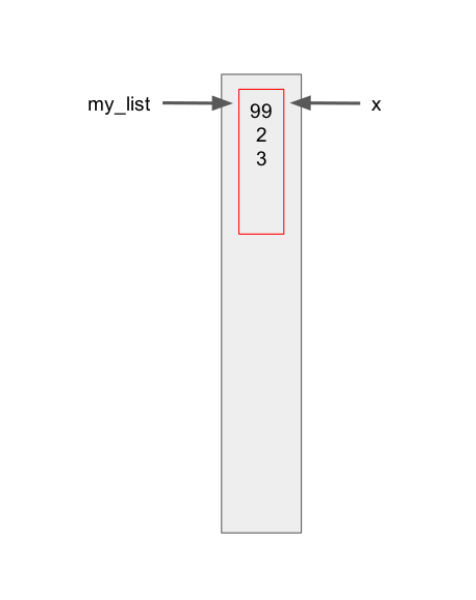

In [5]:
def foo(x):
    """Takes first value of a list and sets it to 99

    Args:
        x (iterable of float): A list of numbers
    
    Returns:
        list
    """
    x[0] = 99 
    # in this case return x would provide same result as my_list = x

my_list = [1,2,3] # global
foo(my_list) #pass my_list into foo
# print(my_list) 
    

[99, 2, 3]

#### INTEGERS ARE IMMUTABLE - they cannot be changed/altered

* Now let's say we have another function bar() that takes an argument and adds ninety to it. Then we assign the value 3 to the variable "my_var" and call bar() with "my_var" as the argument. 

* What do you expect the value of "my_var" to be after we've called bar()? 

* If you said "3", you're right. In Python, integers are immutable, meaning they can't be changed.


In the other example, we created a variable "my_var" and assigned it the value 3. Then we passed it to the function bar(), which caused the argument "x" to point to the same place "my_var" is pointing. But the bar() function assigns "x" to a new value, so the "my_var" variable isn't touched. In fact, there is no way in Python to have changed "x" or "my_var" directly, because integers are immutable variables.


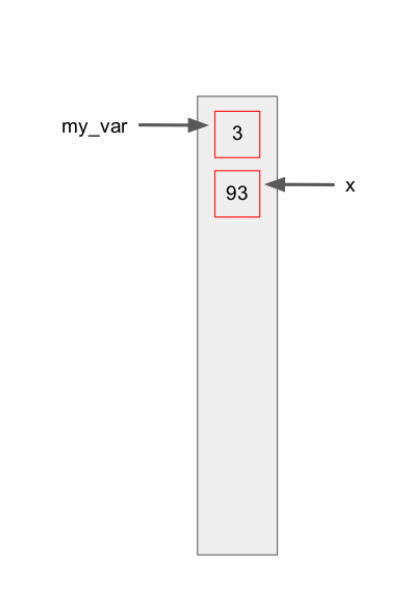

In [15]:
def bar(x):
    """takes an arguement and adds 90 to it

    Args:
        x (type int): single integer
    """
    x = x + 90 
    
my_var = 3 # global INT
bar(my_var) # pass my_var into function bar
print(my_var)


3


In [8]:
def bar(x):
    """takes an arguement and adds 90 to it

    Args:
        x (type int): single integer
    """
    x = x + 90
    return x #if we return x then we are returning 93 as 3+90 = 93
    
my_var = 3
bar(my_var) # pass my_var into function bar



93

#### Mutable or immutable?

Immutable: 
* int
* float
* bool
* string
* bytes
* tuple
* frozenset
* None

Mutable
* list
* dict
* set
* bytearray
* objects
* functions
* almost verything else!

Finally, here is a thing that can get you into trouble. foo() is a function that appends the value 1 to the end of a list. But, whoever wrote this function gave the argument an empty list as a default value. When we call foo() the first time, we get what you would expect, a list with one entry

In [16]:
def foo(var=[]):
    var.append(1)
    return var
foo()

[1]

But, when we call foo() again, the default value has already been modified! 

In [17]:
foo()

[1, 1]

If you really want a mutable variable as a default value, consider defaulting to None and setting the argument in the function.

In [18]:
def foo(var = None):
    if var is None:
        var = []
        var.append(1)
        return var
foo()

[1]

In [19]:
foo()

[1]

The following function adds a mapping between a string and the lowercase version of that string to a dictionary. What do you expect the values of d and s to be after the function is called?

In [ ]:
def store_lower(_dict, _string):
    """Add a mapping between `_string` and a lowercased version of `_string` to `_dict`

    Args:
        _dict (dict): The dictionary to update.
        _string (str): The string to add.
    """
    orig_string = _string           # Hello
    _string = _string.lower()       # hello
    _dict[orig_string] = _string    # {Hello : hello}

d = {}
s = 'Hello'                         # Hello

store_lower(d, s)                   # so d = {Hello : hello}, s = Hello

    """
    When the function assigns _string.lowercase() back to the _string variable, it disconnects _string from both s and orig_string
    
    
    """

#### Best practice for default arguments
One of your co-workers (who obviously didn't take this course) has written this function for adding a column to a pandas DataFrame. Unfortunately, they used a mutable variable as a default argument value! Please show them a better way to do this so that they don't get unexpected behavior.

In [ ]:
def add_column(values, df=pandas.DataFrame()):
    """Add a column of `values` to a DataFrame `df`.
    The column will be named "col_<n>" where "n" is
    the numerical index of the column.

    Args:
        values (iterable): The values of the new column
        df (DataFrame, optional): The DataFrame to update.
        If no DataFrame is passed, one is created by default.

    Returns:
        DataFrame
  """
  df['col_{}'.format(len(df.columns))] = values
  return df

This is because we printed the following code several times:

    add_column(values=range(10))

This would take too long as it would add each column to df individually i.e. with values 0-9 in each col
 

In [ ]:
# Use an immutable variable for the default argument
def better_add_column(values, df=None): # pass only if df is None otherwise don't do anything
    """Add a column of `values` to a DataFrame `df`.
    The column will be named "col_<n>" where "n" is
    the numerical index of the column.

    Args:
        values (iterable): The values of the new column
        df (DataFrame, optional): The DataFrame to update.
        If no DataFrame is passed, one is created by default.

    Returns:
        DataFrame
    """
  # Update the function to create a default DataFrame
  if df is None:
    df = pandas.DataFrame()
  df['col_{}'.format(len(df.columns))] = values
  return df

### Context Managers

These start with: 
* with 
* args = like a function

#### The number of cats

You are working on a natural language processing project to determine what makes great writers so great. Your current hypothesis is that great writers talk about cats a lot. To prove it, you want to count the number of times the word "cat" appears in "Alice's Adventures in Wonderland" by Lewis Carroll. You have already downloaded a text file, alice.txt, with the entire contents of this great book.



In [18]:
# Open "alice.txt" and assign the file to "file"
with open('alice.txt', encoding='utf8') as file:
  text = file.read()

n = 0
for word in text.split():
  if word.lower() in ['cat', 'cats']:
    n += 1

print('Lewis Carroll uses the word "cat" {} times'.format(n))

Lewis Carroll uses the word "cat" 24 times


#### The speed of cats

You're working on a new web service that processes Instagram feeds to identify which pictures contain cats (don't ask why -- it's the internet). The code that processes the data is slower than you would like it to be, so you are working on tuning it up to run faster. Given an image, image, you have two functions that can process it:

* process_with_numpy(image)

* process_with_pytorch(image)

Your colleague wrote a context manager, timer(), that will print out how long the code inside the context block takes to run. She is suggesting you use it to see which of the two options is faster. Time each function to determine which one to use in your web service.

In [19]:
image = get_image_from_instagram() #not created a function for this... hence error

# Time how long process_with_numpy(image) takes to run
with timer():
    print('Numpy version')
    process_with_numpy(image)

# Time how long process_with_pytorch(image) takes to run
with timer():
    print('Pytorch version')
    process_with_pytorch(image)

NameError: name 'get_image_from_instagram' is not defined

#### The timer() context manager


        1. Define a function

        2. (Optional) Add any set up code to your needs

        3. Use the yield KEYWORD

        When you write this word (yield) , it means that you are going to return a value, but you expect to finish the rest of the function at some point in the future. 

        The value that your context manager yields can be assigned to a variable in the "with" statement by adding "as <variable name>". 

        Here, we've assigned the value 42 that my_context() yields to the variable "foo". By running this code, you can see that after the context block is done executing, the rest of the my_context() function gets run, printing "goodbye". 

        4. (Optional) Add any teardown code your context needs

        5. Add the @contextlib.contextmanager decorator

In [26]:

#import module
import contextlib

from contextlib import contextmanager

@contextlib.contextmanager #decorator

# define a function
def my_context():
    print('hello')
    yield 42 # field keyword to signal to python that its a special kind of fuunction
    print('goodbye')
    
with my_context() as foo:
    print('foo is {}'.format(foo))

hello
foo is 42
goodbye


A colleague of yours is working on a web service that processes Instagram photos. Customers are complaining that the service takes too long to identify whether or not an image has a cat in it, so your colleague has come to you for help. You decide to write a context manager that they can use to time how long their functions take to run.

In [28]:
import time 

# Add a decorator from the contextlib module to the timer() function that will make it act like a context manager.
@contextlib.contextmanager 
def timer(): # define function
    """Time the execution of a context block.

    Yields:
        None
    """
    start = time.time()
    # Send control back to the context block
    # Remember that context managers use yield to return control to the context.
    yield
    end = time.time()
    print('Elapsed: {:.2f}s'.format(end - start))

with timer():
    print('This should take approximately 0.25 seconds')
    time.sleep(0.25)

This should take approximately 0.25 seconds


Elapsed: 0.25s


#### A read-only open() context manager

You have a bunch of data files for your next deep learning project that took you months to collect and clean. It would be terrible if you accidentally overwrote one of those files when trying to read it in for training, so you decide to create a read-only version of the open() context manager to use in your project.

The regular open() context manager:

* takes a filename and a mode ('r' for read, 'w' for write, or 'a' for append)
* opens the file for reading, writing, or appending
* yields control back to the context, along with a reference to the file
* waits for the context to finish
* and then closes the file before exiting


Your context manager will do the same thing, except it will only take the filename as an argument and it will only open the file for reading.

Ensure:

* Yield control from open_read_only() to the context block, ensuring that the read_only_file object gets assigned to my_file.

* Use read_only_file's .close() method to ensure that you don't leave open files lying around.

In [29]:
@contextlib.contextmanager
def open_read_only(filename):
    """Open a file in read-only mode.

    Args:
        filename (str): The location of the file to read

    Yields:
        file object
    """
    read_only_file = open(filename, mode='r')
    # Yield read_only_file so it can be assigned to my_file
    yield read_only_file
    # Close read_only_file
    read_only_file.close()

with open_read_only('my_file.txt') as my_file:
    print(my_file.read())

some file that I just created for this course


#### Context managers use cases

Which won't be a good idea to use a context manager?

    A function that starts a timer that keeps track of how long some block of code takes to run. - Good As its a Connect/Disconnet case

    A function that prints all of the prime numbers between 2 and some value n - Bad as you can just run this with a normal function

    A function that connects to a smart thermostat so that it can be programmed remotely.  - Good As its a Connect/Disconnet case

    A function that prevents multiple users from updating an online spreadsheet at the same time by locking access to the spreadsheet before every operation.  - Good As its a Connect/Disconnet case



### Scraping the NASDAQ

Training neural nets is expensive - invest in NVIDIA! To find the best time to invest, collect stock data.

The context manager stock('NVDA') connects to NASDAQ and return an object that you can use to get the latest price by calling its .price() method. You want to connect to stock('NVDA') and record 10 timesteps of price data by writing it to the file NVDA.txt.

You will notice the use of an underscore when iterating over the for loop. If this is confusing to you, don't worry. It could easily be replaced with i, if we planned to do something with it, like use it as an index. Since we won't be using it, we can use a dummy operator, _, which doesn't use any additional memory.

In [ ]:
#Use the "stock('NVDA')" context manager
# and assign the result to the variable "nvda"
with stock('NVDA') as nvda:
  # Open 'NVDA.txt' for writing as f_out
    with open('NVDA.txt', 'w') as f_out:
        for _ in range(10):
            value = nvda.price()
            print('Logging ${:.2f} for NVDA'.format(value))
            f_out.write('{:.2f}\n'.format(value))

#### Changing the working directory

You are using an open-source library that lets you train deep neural networks on your data. Unfortunately, during training, this library writes out checkpoint models (i.e., models that have been trained on a portion of the data) to the current working directory. You find that behavior frustrating because you don't want to have to launch the script from the directory where the models will be saved.

You decide that one way to fix this is to write a context manager that changes the current working directory, lets you build your models, and then resets the working directory to its original location. You'll want to be sure that any errors that occur during model training don't prevent you from resetting the working directory to its original location.

In [30]:
def in_dir(directory):
    """Change current working directory to `directory`,
    allow the user to run some code, and change back.

    Args:
        directory (str): The path to a directory to work in.
    """
    current_dir = os.getcwd()
    os.chdir(directory)

  # Add code that lets you handle errors
    try:
        yield
  # Ensure the directory is reset,
  # whether there was an error or not
    finally:
        os.chdir(current_dir)

### 3. Decorators

#### Function as objects

In [3]:
import pandas as pd


# functions are just another type of object
def x():
    pass
x = [1,2,3]
x = {'foo': 42}
x = pd.DataFrame()
x = 'This is a sentence'
x = 3
x = 71.2

#### Functions as variables

In [5]:
def my_function():
    print('hello')

x = my_function # pass in x as a function
print(type(x)) # what datatype is x 
x() # what does x do - i.e. it is a fucntion that prints x

<class 'function'>
hello


#### Lists and dictionaries as functions

You can also add functions to a list or dictionary. Here, we've added the functions my_function(), open(), and print() to the list "list_of_functions". We can call an element of the list, and pass it arguments. 

Since the third element of the list is the print() function, it prints the string argument to the console

In [7]:
List_of_functions = [my_function, open, print]
List_of_functions[2]('i am printing within an element of my list!')

i am printing within an element of my list!


Below that, we've added the same three functions to a dictionary, under the keys "func1", "func2", and "func3". Since the print() function is stored under the key "func3", we can reference it and use it as if we were calling the function directly.

In [8]:
dict_of_functions = {
    'func1': my_function,
    'func2': open,
    'func3': print
}

dict_of_functions['func3']('i am printing within an element of my list!')

i am printing within an element of my list!


#### Building a command line data app

You are building a command line tool that lets a user interactively explore a dataset. We've defined four functions: mean(), std(), minimum(), and maximum() that users can call to analyze their data. Help finish this section of the code so that your users can call any of these functions by typing the function name at the input prompt.

Note: The function get_user_input() in this exercise is a mock version of asking the user to enter a command. It randomly returns one of the four function names. In real life, you would ask for input and wait until the user entered a value.


In [ ]:
# Add the missing function references to the function map
function_map = {
    'mean': mean,
    'std': std,
    'minimum': minimum,
    'maximum': maximum
}

data = load_data()
print(data)

func_name = get_user_input()

# Call the chosen function and pass "data" as an argument
function_map[func_name](data)

#### Functions as Arguements

We could define these two functions, no() and yes(), and pass them as arguments to the has_docstring() function. 

In [12]:
def has_docstring(func):
    """Check to see if the function 'func' has a docstring

    Args:
        func (callable): A function
        Returns:
        bool
    """
    return func.__doc__ is not None

In [15]:
def no(): # this function dosen't have a docstring so when passed into the function has_docstring as an arguement it will print false
    return 42

def yes(): #this function does have a docstring so when passed into the function has_docstring as an arguement it will print true
    
    """Return the value of 42
    """
    return 42

has_docstring(no) # will print false

False

In [14]:
has_docstring(yes) # will print true

True

#### Reviewing your co-worker's code

Your co-worker is asking you to review some code that they've written and give them some tips on how to get it ready for production. You know that having a docstring is considered best practice for maintainable, reusable functions, so as a sanity check you decide to use this has_docstring() function on all of their functions.

        def has_docstring(func):
            """Check to see if the function 
            `func` has a docstring.

            Args:
                func (callable): A function.

            Returns:
                bool
            """
        return func.__doc__ is not None

In [ ]:
# Call has_docstring() on your co-worker's load_and_plot_data() function.
ok = has_docstring(load_and_plot_data) # function as an arguement

if not ok:
    print("load_and_plot_data() doesn't have a docstring!")
else:
    print("load_and_plot_data() looks ok")

In [ ]:
# Call has_docstring() on the as_2D() function - Check if the function as_2D() has a docstring.
ok = has_docstring(as_2D) # function as an arguement

if not ok:
    print("as_2D() doesn't have a docstring!")
else:
    print("as_2D() looks ok")

In [ ]:
# Call has_docstring() on the log_product() function
ok = has_docstring(log_product) # function as an arguement

if not ok:
    print("log_product() doesn't have a docstring!")
else:
    print("log_product() looks ok")

### Returning functions for a math game

You are building an educational math game where the player enters a math term, and your program returns a function that matches that term. For instance, if the user types "add", your program returns a function that adds two numbers. So far you've only implemented the "add" function. Now you want to include a "subtract" function.

In [35]:
def create_math_function(func_name):
    if func_name == 'add':
        def add(a, b):
            return a + b
        return add
    elif func_name == 'subtract':
        # Define the subtract() function
        def subtract(a,b):
            return a - b
        return subtract
    else:
            print("I don't know that one")
    
add = create_math_function('add')
print('5 + 2 = {}'.format(add(5, 2)))

subtract = create_math_function('subtract')
print('5 - 2 = {}'.format(subtract(5, 2)))

5 + 2 = 7
5 - 2 = 3


#### Scope > Buliten > Global > NonLocal > Local

#### Understanding scope

What four values does this script print?

* one() doesn't change the global x, so the first print() statement prints 50.

* two() does change the global x so the second print() statement prints 30.

* The print() statement inside the function three() is referencing the x value that is local to three(), so it prints 100.

* But three() does not change the global x value so the last print() statement prints 30 again.

In [36]:
x = 50 # global

def one():
    x = 10

def two():
    global x # force x to change to 30
    x = 30

def three():
    x = 100
    print(x) # printing local x here

for func in [one, two, three]:
    func()
    print(x) # printing x here referencing global x
    
# x is 50 in global, then x = 30 in two(), then x = 100 printing local, then x = 30

50
30
100
30


#### Modifying variables outside local scope

Sometimes your functions will need to modify a variable that is outside of the local scope of that function. While it's generally not best practice to do so, it's still good to know how in case you need to do it. Update these functions so they can modify variables that would usually be outside of their scope.


In [37]:
# Add a keyword that lets us update call_count from inside the function.
call_count = 0

def my_function():
    # Use a keyword that lets us update call_count 
    global call_count
    call_count += 1
  
    print("You've called my_function() {} times!".format(
        call_count
    ))
  
for _ in range(20):
    my_function()

You've called my_function() 1 times!
You've called my_function() 2 times!
You've called my_function() 3 times!
You've called my_function() 4 times!
You've called my_function() 5 times!
You've called my_function() 6 times!
You've called my_function() 7 times!
You've called my_function() 8 times!
You've called my_function() 9 times!
You've called my_function() 10 times!
You've called my_function() 11 times!
You've called my_function() 12 times!
You've called my_function() 13 times!
You've called my_function() 14 times!
You've called my_function() 15 times!
You've called my_function() 16 times!
You've called my_function() 17 times!
You've called my_function() 18 times!
You've called my_function() 19 times!
You've called my_function() 20 times!


In [41]:
# Add a keyword that lets us modify file_contents from inside save_contents().

def read_files():
    file_contents = None
  
    def save_contents(filename):
        # Add a keyword that lets us modify file_contents
        # A nonlocal variable is any variable that gets defined in the parent function's scope, and that gets used by the child function.
        nonlocal file_contents
        if file_contents is None:
            file_contents = []
        with open(filename) as fin:
            file_contents.append(fin.read())
      
    for filename in ['1984.txt', 'MobyDick.txt', 'CatsEye.txt']:
        save_contents(filename)
    
    return file_contents

print('\n'.join(read_files()))

It was a bright day in April, and the clocks were striking thirteen.

Call me Ishmael.

Time is not a line but a dimension, like the dimensions of space.



In [43]:
import random

def wait_until_done():
    def check_is_done(): #nested function (defined inside another function)
        # Add a keyword so that wait_until_done() 
        # doesn't run forever
        global done
        if random.random() < 0.1:
            done = True
      
    while not done:
        check_is_done()

done = False
wait_until_done()

print('Work done? {}'.format(done))

Work done? True


#### Closures

A closure in Python is a tuple of variables that are no longer in scope, but that a function needs in order to run. Let's explain this with an example. 

The function foo() defines a nested function bar() that prints the value of "a". foo() returns this new function, so when we say "func = foo()" we are assigning the bar() function to the variable "func".

Now what happens when we call func()? As expected, it prints the value of variable "a", which is 5. But wait a minute, how does function "func()" know anything about variable "a"? "a" is defined in foo()'s scope, not bar()'s. You would think that "a" would not be observable outside of the scope of foo(). That's where closures come in.


In [21]:
def foo():
    a = 5
    def bar(): #nested function
        print(a)
    return bar 

func = foo()
func()

5


 When foo() returned the new bar() function, Python helpfully attached any nonlocal variable that bar() was going to need to the function object. Those variables get stored in a tuple in the "__closure__" attribute of the function. 
 
 The closure for "func" has one variable, and you can view the value of that variable by accessing the "cell_contents" of the item.

In [22]:
type(func.__closure__)

tuple

In [24]:
len(func.__closure__)

1

In [23]:
func.__closure__[0].cell_contents

5

#### Another example of closures....

imagine if you need an interface where the user enters a number, when the okay button is pressed the function  def enter_number(x): is executed and the number is added to a list and the entered numbers in the list will be printed. How ill this be programmed?

In [25]:
def enter_number(x):
    numbers = [] # create empty list
    numbers.append(x) #append the list each time when the fucntion is called
    print(numbers)

enter_number(3)
enter_number(5)
enter_number(7)

# However, we can see the list of numbers only contians 1 item, 
# # this is because the list is created each time when the function is called

[3]
[5]
[7]


In [29]:
numbers = [] # so lets move the list out of the function and put it in the global scope

def enter_number(x):
    numbers.append(x) 
    print(numbers)

enter_number(3)
enter_number(5)
enter_number(7)

#now the list is updated with each entered number but the function now has access to a variable outside of the function
# bad because the function could not be moved to another module without also moving the numbers variable
# they need to belong together - closures can help this!

[3]
[3, 5]
[3, 5, 7]


In [36]:
# Closure: a function in another function

def enter_number_outer(): #contains the number vairable
    number = []
    def enter_number_inner(): # adds the numebers to numbers list
        number.append(x)
        print(number)

    return enter_number_inner
    
enter_num = enter_number_outer() #in order to call the inner function it needs to be called by the outer function
#calling the outer function now gets reference to the inner function
#since enter_num is a reference to a funciton it is callable

enter_number(3)
enter_number(5)
enter_number(7)

#basically the inner function has access to variables in its outer function
# so we say the inner function closes over the outer funciton

[3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3]
[3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5]
[3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7]


#### Checking for closure

You're teaching your niece how to program in Python, and she is working on returning nested functions. She thinks she has written the code correctly, but she is worried that the returned function won't have the necessary information when called. Show her that all of the nonlocal variables she needs are in the new function's closure.

Note: 
A nonlocal variable is any variable that gets defined in the parent function's scope, and that gets used by the child function.

In [44]:
def return_a_func(arg1, arg2):
    def new_func():
        print('arg1 was {}'.format(arg1))
        print('arg2 was {}'.format(arg2))
    return new_func
    
my_func = return_a_func(2, 17) # this statement references the outer funciton making it callable

# Show that my_func()'s closure is not None
print(my_func.__closure__ is not None)

True


In [47]:
# Show that there are two variables in the closure.

def return_a_func(arg1, arg2):
    def new_func():
        print('arg1 was {}'.format(arg1))
        print('arg2 was {}'.format(arg2))
    return new_func
    
my_func = return_a_func(2, 17)

print(my_func.__closure__ is not None)

# Show that there are two variables in the closure
print(len(my_func.__closure__) == 2)

True
True


In [54]:
# Get the values of the variables in the closure so you can show that they are equal to [2, 17], the arguments passed to return_a_func().

def return_a_func(arg1, arg2):
    def new_func():
        print('arg1 was {}'.format(arg1))
        print('arg2 was {}'.format(arg2))
    return new_func
    
my_func = return_a_func(2, 17)

print(my_func.__closure__ is not None)
print(len(my_func.__closure__) == 2)

# Get the values of the variables in the closure
closure_values = [
    my_func.__closure__[i].cell_contents for i in range(2)
]
print(closure_values == [2, 17])



True
True
True


#### Closures keep your values safe

You are still helping your niece understand closures. You have written the function get_new_func() that returns a nested function. The nested function call_func() calls whatever function was passed to get_new_func(). You've also written my_special_function() which simply prints a message that states that you are executing my_special_function().

You want to show your niece that no matter what you do to my_special_function() after passing it to get_new_func(), the new function still mimics the behavior of the original my_special_function() because it is in the new function's closure.

In [56]:
# Show that you still get the original message even if you redefine my_special_function() to only print "hello".

def my_special_function():
    print('You are running my_special_function()')
  
def get_new_func(func):
    def call_func():
        func()
    return call_func

#you are passing outer function inside the inner function so we have access
new_func = get_new_func(my_special_function) 

# Redefine my_special_function() to just print "hello"
def my_special_function():
  print('hello')

new_func()

You are running my_special_function()


In [55]:
# how that even if you delete my_special_function(), you can still call new_func() without any problems.

def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Delete my_special_function()
del(my_special_function)

new_func()

You are running my_special_function()


In [59]:
# Show that you still get the original message even if you overwrite my_special_function() with the new function.
def my_special_function():
    print('You are running my_special_function()')
  
def get_new_func(func):
    def call_func():
        func()
    return call_func

# Overwrite `my_special_function` with the new function
my_special_function = get_new_func(my_special_function)

my_special_function()

You are running my_special_function()


#### What are Decorators?

Let's say you have a function that takes some inputs and returns some outputs.

A decorator is a wrapper that you can place around a function that changes that function's behavior.

You can modify the inputs, outputs, or even change the behaviour of the funciton itself

In [39]:
def multiply(a,b):
    return a*b

def double_args(func): #first we define the function double_args which takes input of a and b and times by 2
    def wrapper(a,b):
        return func(a*2, b*2)
    return wrapper 
multiply = double_args(multiply) # 1*2 = 2, 5*2 = 10 so 10*2 = 20
multiply(1,5)

20

In [41]:
# now that we have defined the function double_args we can use it as a wrapper
@double_args # decorator which modifies the behaviour of the function
def multiply(a,b):
    return a*b

multiply(1,5)

20

#### Using decorator syntax

You have written a decorator called print_args that prints out all of the arguments and their values any time a function that it is decorating gets called.

In [ ]:
def my_function(a, b, c):
  print(a + b + c)

# Decorate my_function() with the print_args() decorator
my_function = print_args(my_function)

my_function(1, 2, 3)

In [ ]:
# Decorate my_function() with the print_args() decorator
@print_args
def my_function(a, b, c):
  print(a + b + c)

my_function(1, 2, 3)

#### Defining a decorator

Your buddy has been working on a decorator that prints a "before" message before the decorated function is called and prints an "after" message after the decorated function is called. They are having trouble remembering how wrapping the decorated function is supposed to work. Help them out by finishing their print_before_and_after() decorator.

In [49]:
def print_before_and_after(func):
    def wrapper(*args):
        print('Before {}'.format(func.__name__))
        # Call the function being decorated with *args
        func(*args)
        print('After {}'.format(func.__name__))
        # Return the nested function
    return wrapper

@print_before_and_after
def multiply(a, b):
    print(a * b)

multiply(5, 10)

Before multiply
50
After multiply


### 4. More on Decorators

In [56]:
#import module time
import time

def timer(func):
    """A decorator that prints how long a function took to run

    Args:
        func (callable): The funciton being dcorated
        
    Returns:
        callabe: The decorated function
    """
    # define the wrapper function to return.
    def wrapper(*args, **kwargs):
        # when the wrapper is called get the current time
        t_start = time.time()
        #call the decorated function and store the result
        result = func(*args, **kwargs)
        #get the total time it took to run, and print it
        t_total = time.time() - t_start
        print('{} took {}s'.format(func.__name__, t_total))
        return result
    return wrapper

In [57]:
# now we can use timer....

# use the decorator function that we previously defined
@timer 
def sleep_n_seconds(n):
    time.sleep(n)

sleep_n_seconds(5)

sleep_n_seconds took 5.000992059707642s


In [62]:
def memorize(func):
    """Store the results of the decorated function for fast lookup

    """
    #store the results in a dict that maps arguements to results
    cache = {}
    #define the wrapper fucniton to return
    def wrapper(*args, **kwargs):
        #if these arguements haven't been seen before,
        if (args, kwargs) not in cache:
            #call func() and store the result
            cache[(args, kwargs)] = func(*args, **kwargs)
        return cache[(args, kwargs)]
    return wrapper

In [66]:
@memorize
def slow_function(a, b):
    print('Sleeping...')
    time.sleep(5)
    return a + b 

slow_function(3,4)

TypeError: unhashable type: 'dict'

#### Print the return type

You are debugging a package that you've been working on with your friends. Something weird is happening with the data being returned from one of your functions, but you're not even sure which function is causing the trouble. 

You know that sometimes bugs can sneak into your code when you are expecting a function to return one thing, and it returns something different. For instance, if you expect a function to return a numpy array, but it returns a list, you can get unexpected behavior. 

To ensure this is not what is causing the trouble, you decide to write a decorator, print_return_type(), that will print out the type of the variable that gets returned from every call of any function it is decorating.

In [71]:
def print_return_type(func):
    # Create a nested function, wrapper(), that will become the new decorated function.
    def wrapper(*args, **kwargs):
        # Call the function being decorated
        result = func(*args, **kwargs)
        print('{}() returned type {}'.format(
        func.__name__, type(result)
        ))
        return result
    # Return the new decorated function
    return wrapper
    
@print_return_type
def foo(value):
    return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))

foo() returned type <class 'int'>
42
foo() returned type <class 'list'>
[1, 2, 3]
foo() returned type <class 'dict'>
{'a': 42}


#### Counter

You're working on a new web app, and you are curious about how many times each of the functions in it gets called. So you decide to write a decorator that adds a counter to each function that you decorate. You could use this information in the future to determine whether there are sections of code that you could remove because they are no longer being used by the app.

In [72]:
def counter(func):
    def wrapper(*args, **kwargs):
        wrapper.count += 1
        # Call the function being decorated and return the result
        return func
    # Set count to 0 to initialize call count for each new decorated function
    wrapper.count = 0
    # Return the new decorated function
    return wrapper

    # Decorate foo() with the counter() decorator
@counter
def foo():
    print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

foo() was called 2 times.


#### Decorators and metadata

Here we have a nice function, sleep_n_seconds(), with a docstring that explains exactly what it does. If we look at the docstring attribute, we can see the text of the docstring.

We can also access other metadata for the function, like its name and default arguments.

But watch what happens when we decorate sleep_n_seconds() with the timer() decorator as we've done here. When we try to print the docstring, we get nothing back. Even stranger, when we try to look up the function's name, Python tells us that sleep_n_seconds()'s name is "wrapper".

In [74]:
@timer
def sleep_n_seconds(n=10):
    """Pause processing for n seconds

    Args:
        n (int): number of seconds to pause for
    """
    time.sleep(n)
print(sleep_n_seconds.__doc__)

None


In [75]:
print(sleep_n_seconds.__name__)

wrapper


To understand why we have to examine the timer() decorator. Remember that when we write decorators, we almost always define a nested function to return. 

Because the decorator overwrites the sleep_n_seconds() function, when you ask for sleep_n_seconds()'s docstring or name, you are actually referencing the nested function that was returned by the decorator. In this case, the nested function was called wrapper() and it didn't have a docstring.

In [81]:
# import module
from functools import wraps

def timer(func):
    """A decorator that prints how long a function took to run
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        t_start = t.time()
        
        result = func(*args, *kwargs)
        
        t_toal = t.time() - t.start
        print('{} too {}s'.format(func.__nam__, t_total))
        
        return result
    return wrapper

In [82]:
# going back to the original function
@timer
def sleep_n_seconds(n=10):
    """Pause processing for n seconds

    Args:
        n (int): number of seconds to pause for
    """
    time.sleep(n)
sleep_n_seconds.__wrapped__ # __wrapped__ 

<function __main__.sleep_n_seconds(n=10)>

In [83]:
print(sleep_n_seconds.__doc__)

Pause processing for n seconds

    Args:
        n (int): number of seconds to pause for
    


In [84]:
print(sleep_n_seconds.__name__)

sleep_n_seconds


#### Preserving docstrings when decorating functions

Your friend has come to you with a problem. They've written some nifty decorators and added them to the functions in the open-source library they've been working on. However, they were running some tests and discovered that all of the docstrings have mysteriously disappeared from their decorated functions. Show your friend how to preserve docstrings and other metadata when writing decorators.

In [85]:
def add_hello(func):
    def wrapper(*args, **kwargs):
        print('Hello')
        return func(*args, **kwargs)
    return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
    """Adds two numbers and prints the sum"""
    print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
None


In [86]:
def add_hello(func):
    def wrapper(*args, **kwargs):
        # To show your friend that they are printing the wrapper() function's docstring, not the print_sum() docstring, add the following docstring to wrapper():
        """Print 'hello' and then call the decorated function."""
        print('Hello')
        return func(*args, **kwargs)
    return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
    """Adds two numbers and prints the sum"""
    print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
Print 'hello' and then call the decorated function.


In [87]:
# Import the function you need to fix the problem
from functools import wraps

def add_hello(func):
    def wrapper(*args, **kwargs):
        # To show your friend that they are printing the wrapper() function's docstring, not the print_sum() docstring, add the following docstring to wrapper():
        """Print 'hello' and then call the decorated function."""
        print('Hello')
        return func(*args, **kwargs)
    return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
    """Adds two numbers and prints the sum"""
    print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
Print 'hello' and then call the decorated function.


In [88]:
# Import the function you need to fix the problem
from functools import wraps

def add_hello(func):
    # Decorate wrapper() so that it keeps func()'s metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
        # To show your friend that they are printing the wrapper() function's docstring, not the print_sum() docstring, add the following docstring to wrapper():
        """Print 'hello' and then call the decorated function."""
        print('Hello')
        return func(*args, **kwargs)
    return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
    """Adds two numbers and prints the sum"""
    print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
Adds two numbers and prints the sum


#### Measuring decorator overhead

Your boss wrote a decorator called check_everything() that they think is amazing, and they are insisting you use it on your function. 

However, you've noticed that when you use it to decorate your functions, it makes them run much slower. You need to convince your boss that the decorator is adding too much processing time to your function. 

To do this, you are going to measure how long the decorated function takes to run and compare it to how long the undecorated function would have taken to run. This is the decorator in question:

    def check_everything(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        check_inputs(*args, **kwargs)
        result = func(*args, **kwargs)
        check_outputs(result)
        return result
    return wrapper


In [89]:
@check_everything
def duplicate(my_list):
    """Return a new list that repeats the input twice"""
    return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

NameError: name 'check_everything' is not defined

#### Decorators that take arguements 

Let's consider this silly run_three_times() decorator. If you use it to decorate a function, it will run that function three times. If we use it to decorate the print_sum() function and then run print_sum(3,5), it will print 8 three times.

Let's think about what we would need to change if we wanted to write a run_n_times() decorator. We want to pass "n" as an argument, instead of hard-coding it in the decorator. 

If we had some way to pass n into the decorator, we could decorate print_sum() so that it gets run three times and decorate print_hello() to run five times. But a decorator is only supposed to take one argument - the function it is decorating. Also, when you use decorator syntax, you're not supposed to use the parentheses. So what gives?

In [95]:
def run_three_times(func):
    def wrapper(*args, **kwargs):
        for i in range(3):
            func(*args, **kwargs)
        return wrapper
#decorator = @run_n_times
@run_n_times(3) #want to pass n into the decorator instead of 3 (hard coding it)
def print_sum(a, b):
    print(a + b)
@run_n_times(5)
def print_hello():
    print('Hello')
  

#### A decorator factory

To make run_n_times() work, we have to turn it into a function that returns a decorator, rather than a function that is a decorator. So let's start by redefining run_n_times() so that it takes n as an argument, instead of func. 

Then, inside of run_n_times(), we'll define a new decorator function. This function takes "func" as an argument because it is the function that will be acting as our decorator. 

We start our new decorator with a nested wrapper() function, as usual. Now, since we are still inside the run_n_times() function, we have access to the n parameter that was passed to run_n_times(). 

We can use that to control how many times we repeat the loop that calls our decorated function. As usual for any decorator, we return the new wrapper() function. And, if run_n_times() returns the decorator() function we just defined, then we can use that return value as a decorator. 

Notice how when we decorate print_sum() with run_n_times(), we use parentheses after @run_n_times. This indicates that we are actually calling run_n_times() and decorating print_sum() with the result of that function call. Since the return value from run_n_times() is a decorator function, we can use it to decorate print_sum().

In [90]:
def run_n_times(n):
    """Define and return decorator"""
    # this is the new decorator with a nested wrapper function
    def decorator(func):
        def wrapper(*args, **kwargs):
            for i in range(n):
                func(*args, **kwargs)
            return wrapper
        return decorator
    @run_n_times(3)
    def print_sum(a,b):
        print(a + b)

#### Run_n_times()

In the video exercise, I showed you an example of a decorator that takes an argument: run_n_times(). The code for that decorator is repeated below to remind you how it works. Practice different ways of applying the decorator to the function print_sum().

In [94]:
# Add the run_n_times() decorator to print_sum() using decorator syntax so that print_sum() runs 10 times.

@run_n_times(10)
def print_sum(a, b):
  print(a + b)
  
print_sum(15, 20)

35
35
35
35
35
35
35
35
35
35


In [97]:
# Use run_n_times() to create a decorator run_five_times() that will run any function five times.

run_five_times = run_n_times(5)

@run_five_times
def print_sum(a, b):
    print(a + b)
  
print_sum(4, 100)

104
104
104
104
104


In [98]:
# Here's the prank: use run_n_times() to modify the built-in print() function so that it always prints 20 times!

print = run_n_times(20)(print)

print('What is happening?!?!')

What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!


#### HTML Generator

You are writing a script that generates HTML for a webpage on the fly. So far, you have written two decorators that will add bold or italics tags to any function that returns a string. 

You notice, however, that these two decorators look very similar. Instead of writing a bunch of other similar looking decorators, you want to create one decorator, html(), that can take any pair of opening and closing tags.

In [101]:
# create 2 decorators

def bold(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        msg = func(*args, **kwargs)
        return '<b>{}</b>'.format(msg)
    return wrapper

def italics(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        msg = func(*args, **kwargs)
        return '<i>{}</i>'.format(msg)
    return wrapper

In [105]:
def html(open_tag, close_tag):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            msg = func(*args, **kwargs)
            return '{}{}{}'.format(open_tag, msg, close_tag)
            # Return the decorated function
        return wrapper
    # Return the decorator
    return decorator

In [107]:
# Make hello() return bolded text
# Use the html() decorator to wrap the return value of hello() in the strings <b> and </b> (the HTML tags that mean "bold").

@html('<b>', '</b>')
def hello(name):
    return 'Hello {}!'.format(name)
  
print(hello('Alice'))

<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>
<b>Hello Alice!</b>


In [109]:
# Make goodbye() return italicized text
@html('<i>', '</i>')
def goodbye(name):
  return 'Goodbye {}.'.format(name)
  
print(goodbye('Alice'))

<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>
<i>Goodbye Alice.</i>


In [110]:
# Wrap the result of hello_goodbye() in <div> and </div>
@html('<div>', '</div>')
def hello_goodbye(name):
  return '\n{}\n{}\n'.format(hello(name), goodbye(name))
  
print(hello_goodbye('Alice'))

<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
</div>
<div>
<b>H

#### Real World Example of decorator that takes and arguement


let's imagine that we have some functions that occasionally either run for longer than we want them to or just hang and never return.

It would be nice if we could add some kind of timeout() decorator to those functions that will raise an error if the function runs for longer than expected.

To create the timeout() decorator, we are going to use some functions from Python's signal module. These functions have nothing to do with decorators, but understanding them will help you understand the timeout() decorator I am about to show you. 

The raise_timeout() function simply raises a TimeoutError when it is called. 

The signal() function tells Python, "When you see the signal whose number is signalnum, call the handler function." In this case, we tell Python to call raise_timeout() whenever it sees the alarm signal. 

The alarm() function lets us set an alarm for some number of seconds in the future. Passing 0 to the alarm() function cancels the alarm.

In [112]:
import signal
def raise_timeout(*args, **kwargs):
    raise TimeoutError()
#when an alarm signal goes off, call raise_timeout()
signal.signal(signalnum = signal.SIGALRM, handler = raise_timeout) #NOTE: windows can't use attribute signal.SIGALRM
#set off an alarm in 5 seconds
signal.alarm(5)

signal.sig

AttributeError: module 'signal' has no attribute 'SIGALRM'

We'll start by creating a decorator that times out in exactly 5 seconds, and then build from there to create a decorator that takes the timeout length as an argument. 

Our timeout_in_5s() decorator starts off by defining a wrapper() function to return as the new decorated function. Returning this function is what makes timeout_in_5s() a decorator. 

First wrapper() sets an alarm for 5 seconds in the future. 

Then it calls the function being decorated. 

It wraps that call in a try block so that in a finally block we can cancel the alarm. This ensures that the alarm either rings or gets canceled. Remember, when the alarm rings, Python calls the raise_timeout() function. 

Let's use timeout_in_5s() to decorate a function that will definitely timeout. 

foo() sleeps for 10 seconds and then prints "foo!". 

If we call foo(), the 5-second alarm will ring before it finishes sleeping, and Python will raise a TimeoutErrror.

In [114]:
def timeout_in_5s(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        #set alarm for 5 secs
        signal.alarm(5)
    
        try:
            #call the decorated func
            return func(*args, **kwargs)
        
        finally:
            #cancel alarm
            signal.alarm(0)
    
    return wrapper

# use the decorater function
@timeout_in_5s
def foo():
    time.sleep(10)
    print('foo!')
    
foo()

AttributeError: module 'signal' has no attribute 'alarm'

Now let's create a more useful version of the timeout() decorator. 

This decorator takes an argument. To decorate foo() we'll set the timeout to 5 seconds like we did previously. But when decorating bar(), we can set the timeout to 20 seconds. 

This allows us to set a timeout that is appropriate for each function. timeout() is a function that returns a decorator. I like to think of it as a decorator factory. 

When you call timeout(), it cranks out a brand new decorator that times out in 5 seconds, or 20 seconds, or whatever value we pass as n_seconds. 

The first thing we need to do is define this new decorator that it will return. That decorator begins, like all of our decorators, by defining a wrapper() function to return. 

Now because n_seconds is available to the wrapper() function we can set an alarm for n_seconds in the future. The rest of the wrapper() function looks exactly like the wrapper() function from the timeout_in_5s() function. 

Notice that wrapper() returns the result of calling func(), decorator() returns wrapper, and timeout() returns decorator. So when we call foo(), which has a 5-second timeout, it will timeout like before. But bar(), which has a 20-second timeout, prints its message in 10 seconds, so the alarm gets canceled.

In [116]:
def timeout_in_5s(func):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            #set alarm for 5 secs
            signal.alarm(5)
        
            try:
                #call the decorated func
                return func(*args, **kwargs)
            
            finally:
                #cancel alarm
                signal.alarm(0)
        
        return wrapper
    return decorator

# use the decorater function
@timeout(5)
def foo():
    time.sleep(10)
    print('foo!')

@timeout(20)
def bar():
    time.sleep(10)
    print('Bar!')
    
foo()
bar()

NameError: name 'timeout' is not defined

#### Tag your functions

Tagging something means that you have given that thing one or more strings that act as labels. For instance, we often tag emails or photos so that we can search for them later. You've decided to write a decorator that will let you tag your functions with an arbitrary list of tags. You could use these tags for many things:

* Adding information about who has worked on the function, so a user can look up who to ask if they run into trouble using it.

* Labeling functions as "experimental" so that users know that the inputs and outputs might change in the future.

* Marking any functions that you plan to remove in a future version of the code. etc...

In [122]:
def tag(*tags):
    # Define a new decorator, named "decorator", to return
    def decorator(func):
        # Ensure the decorated function keeps its metadata
        @wraps(func)
        def wrapper(*args, **kwargs):
            # Call the function being decorated and return the result
            return func(*args, **kwargs)
        wrapper.tags = tags
        return wrapper
    # Return the new decorator
    return decorator

@tag('test', 'this is a tag')
def foo():
    pass

print(foo.tags)

('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')
('test', 'this is a tag')


#### Check the return type

Python's flexibility around data types is usually cited as one of the benefits of the language. It can sometimes cause problems though if incorrect data types go unnoticed. 

You've decided that in order to ensure your code is doing exactly what you want it to do, you will explicitly check the return types in all of your functions and make sure they're returning what you expect. To do that, you are going to create a decorator that checks if the return type of the decorated function is correct.

Note: assert is a keyword that you can use to test whether something is true. If you type assert condition and condition is True, this function doesn't do anything. If condition is False, this function raises an error. The type of error that it raises is called an AssertionError.

In [124]:
def returns_dict(func):
    # Complete the returns_dict() decorator
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        assert type(result) == dict
        return result
    return wrapper
  
@returns_dict
def foo(value):
    return value

try:
    print(foo([1,2,3]))
except AssertionError:
    print('foo() did not return a dict!')
  

foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!


In [127]:
# Now complete the returns() decorator, which takes the expected return type as an argument.

def returns(return_type):
    # Complete the returns() decorator
    def decorator(func):
        def wrapper(*args, **kwargs):
            result = func(*args, **kwargs)
            assert type(result) == return_type
            return result
        return wrapper
    return decorator
    
@returns(dict)
def foo(value):
    return value

try:
    print(foo([1,2,3]))
except AssertionError:
    print('foo() did not return a dict!')

foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
foo() did not return a dict!
